## Simulating observations with MUSTANG-2

MUSTANG-2 is a bolometric array on the [Green Bank Telescope](https://en.wikipedia.org/wiki/Green_Bank_Telescope). In this notebook we simulate an observation of the Whirlpool Galaxy (M51).

2025-11-13 01:51:20.338 INFO: Fetching https://github.com/thomaswmorris/maria-data/raw/master/maps/crab_nebula.fits


Downloading:   0%|                | 0.00/2.00M [00:00<?, ?B/s]

Downloading: 100%|████████████████| 2.00M/2.00M [00:00<00:00, 81.2MB/s]

ProjectedMap:
  shape(nu, y, x): (1, 500, 500)
  stokes: naive
  nu: [93.] GHz
  t: naive
  z: naive
  quantity: rayleigh_jeans_temperature
  units: K_RJ
    min: 0.000e+00
    max: 5.876e-02
  center:
    ra: 05ʰ34ᵐ31.80ˢ
    dec: 22°01’3.00”
  size(y, x): (8.83’, 8.83’)
  resolution(y, x): (1.06”, 1.06”)
  beam(maj, min, rot): [[0. 0. 0.]] rad
  memory: 4 MB


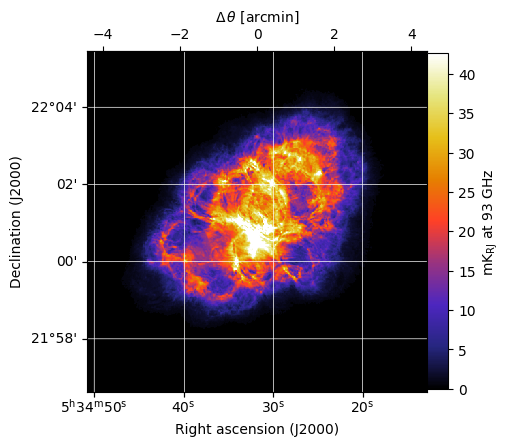

In [1]:
import maria
from maria.io import fetch

input_map = maria.map.load(fetch("maps/crab_nebula.fits"), nu=93e9)

input_map.plot()
print(input_map)

PlanList(2 plans, 900 s):
                           start_time duration    target(ra,dec)     center(az,el)
chunk                                                                             
0      2025-11-13 05:28:13.939 +00:00    600 s  (83.63°, 22.02°)  (116.3°, 60.99°)
1      2025-11-13 05:38:51.439 +00:00    300 s  (83.63°, 22.01°)    (119°, 62.41°)


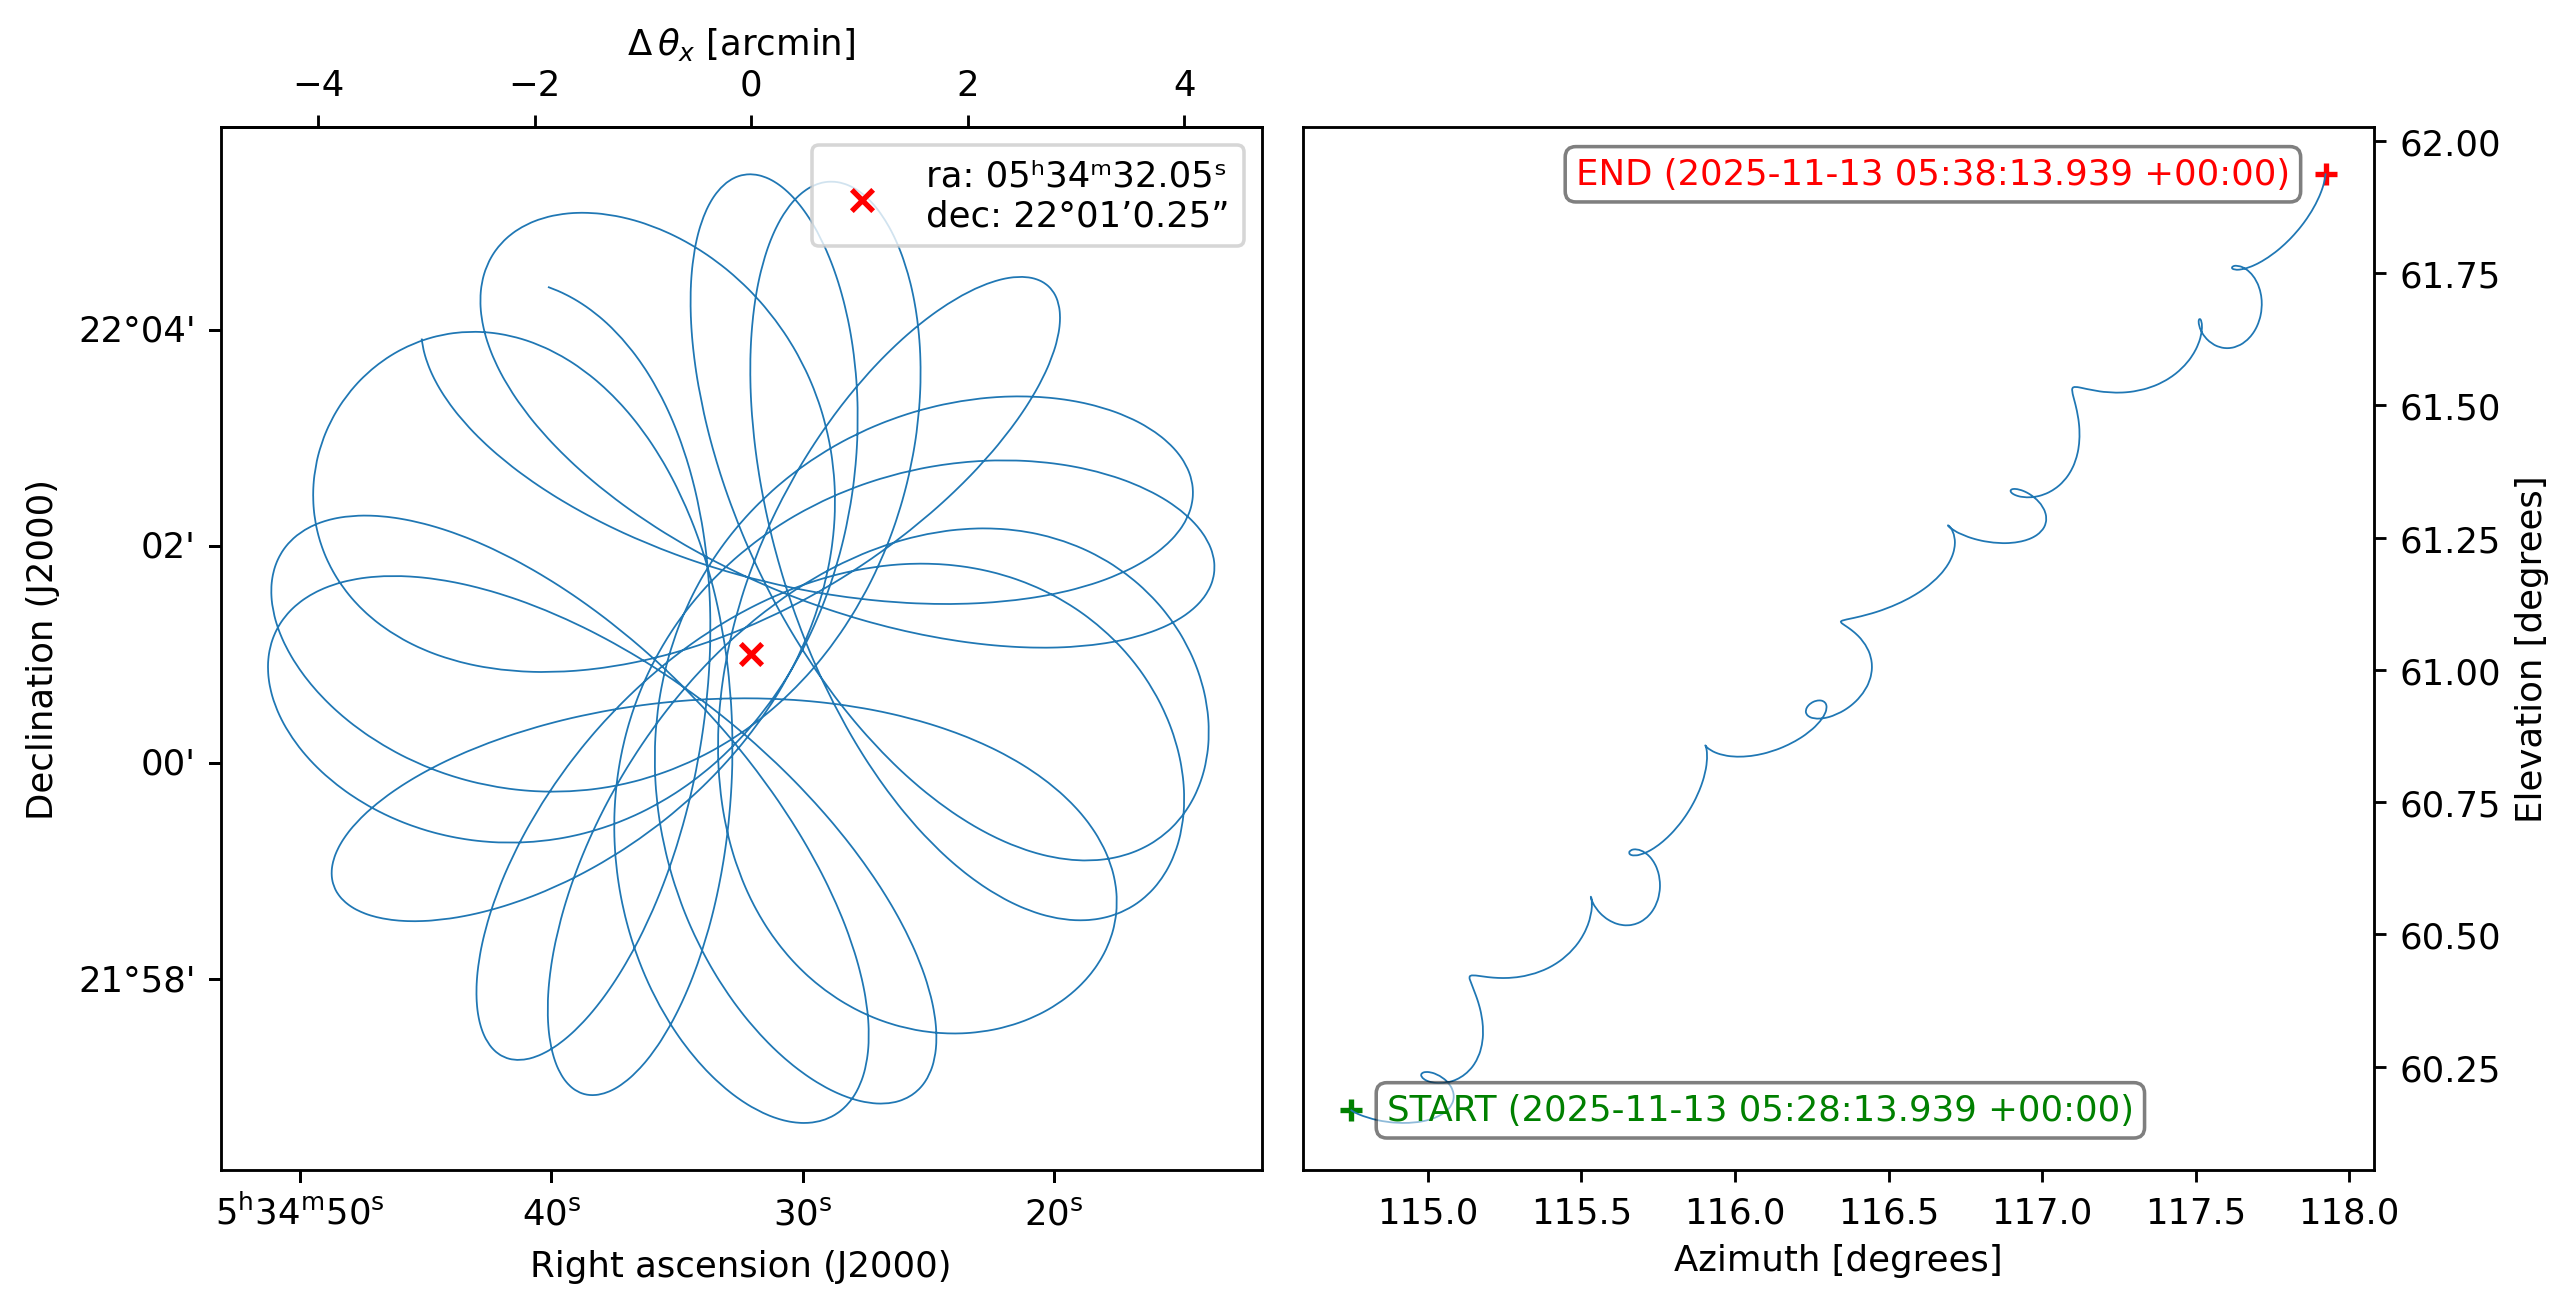

In [2]:
from maria import Planner

planner = Planner(target=input_map, site="green_bank", constraints={"el": (60, 90)})
plans = planner.generate_plans(total_duration=900, sample_rate=100)

plans[0].plot()
print(plans)

Instrument(1 array)
├ arrays:
│            n   FOV baseline      bands polarized
│  array1  217  4.2’      0 m  [m2/f093]     False
│ 
└ bands:
         name     center      width    η      NEP          NET_RJ          NET_CMB    FWHM
   0  m2/f093  86.21 GHz  20.98 GHz  0.1  15 aW√s  0.5711 mK_RJ√s  0.6905 mK_CMB√s  9.133”


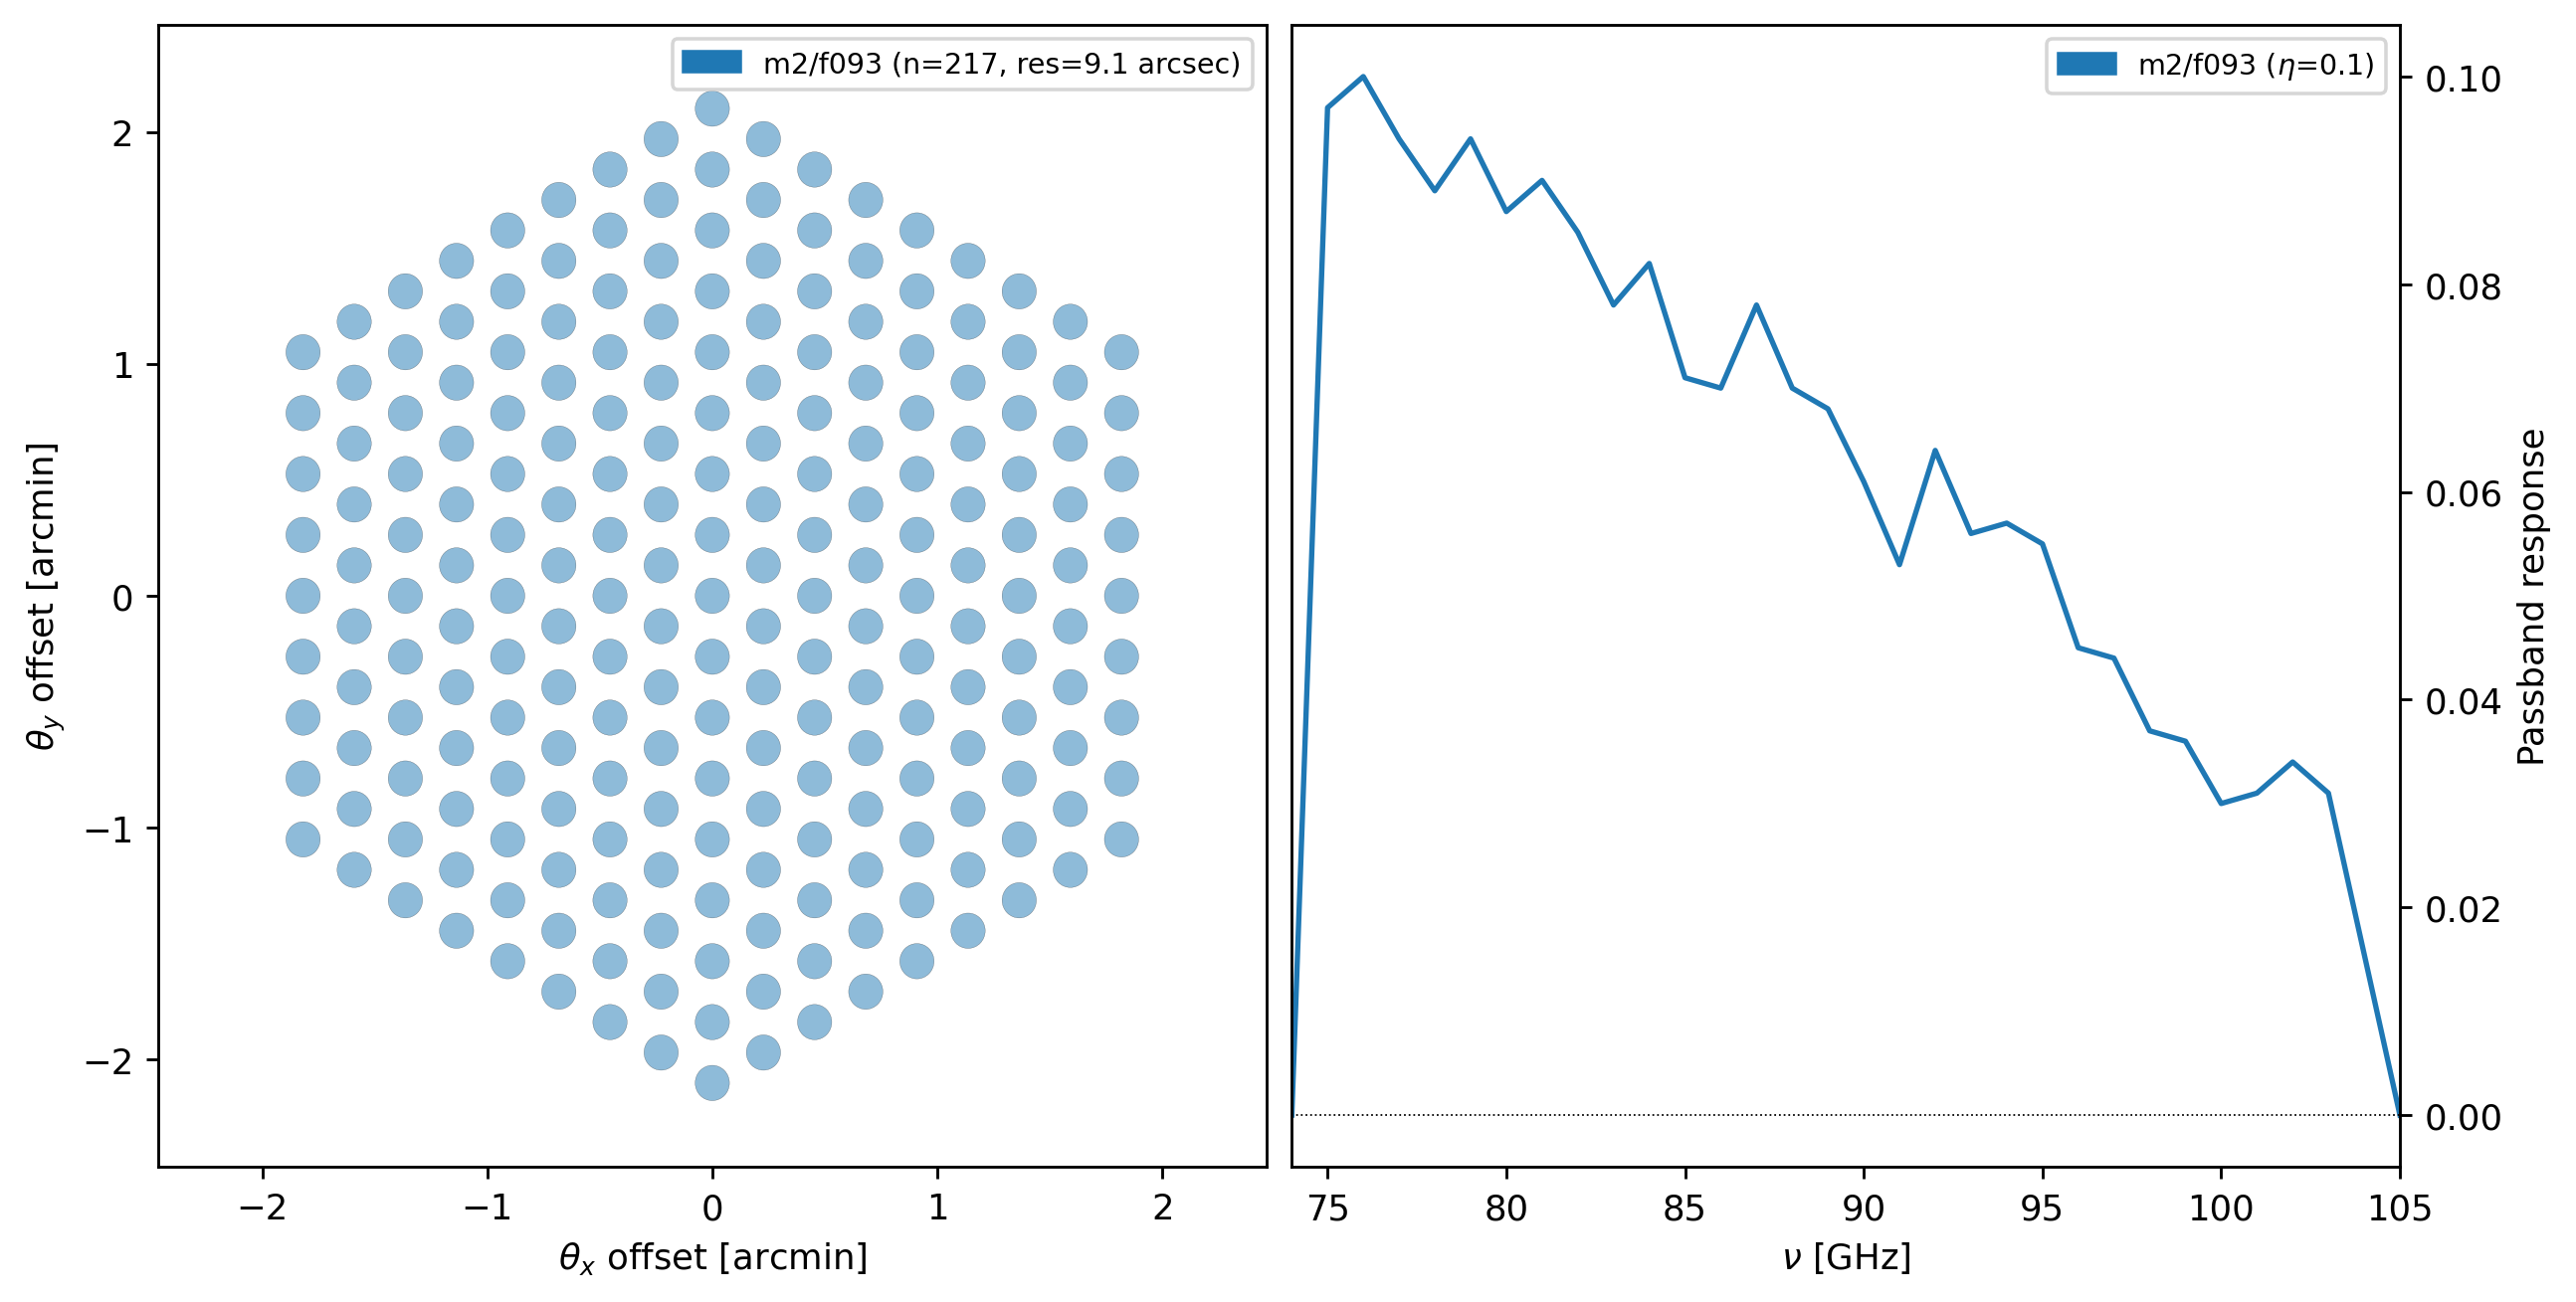

In [3]:
instrument = maria.get_instrument("MUSTANG-2")
print(instrument)
instrument.plot()

In [4]:
sim = maria.Simulation(
    instrument,
    plans=plans,
    site="green_bank",
    map=input_map,
    atmosphere="2d",
)

print(sim)

2025-11-13 01:51:30.541 INFO: Fetching https://github.com/thomaswmorris/maria-data/raw/master/atmosphere/spectra/am/v3/green_bank.h5


Downloading:   0%|                | 0.00/22.0M [00:00<?, ?B/s]

Downloading:  82%|█████████████   | 18.0M/22.0M [00:00<00:00, 180MB/s]

Downloading: 100%|████████████████| 22.0M/22.0M [00:00<00:00, 186MB/s]

2025-11-13 01:51:31.261 INFO: Fetching https://github.com/thomaswmorris/maria-data/raw/master/atmosphere/weather/era5/green_bank.h5


Downloading:   0%|                | 0.00/12.0M [00:00<?, ?B/s]

Downloading: 100%|████████████████| 12.0M/12.0M [00:00<00:00, 144MB/s]

Simulation
├ Instrument(1 array)
│ ├ arrays:
│ │            n   FOV baseline      bands polarized
│ │  array1  217  4.2’      0 m  [m2/f093]     False
│ │ 
│ └ bands:
│          name     center      width    η      NEP          NET_RJ          NET_CMB    FWHM
│    0  m2/f093  86.21 GHz  20.98 GHz  0.1  15 aW√s  0.5711 mK_RJ√s  0.6905 mK_CMB√s  9.133”
├ Site:
│   region: green_bank
│   timezone: America/New_York
│   location:
│     longitude: 79°50’23.28” W
│     latitude:  38°25’59.16” N
│     altitude: 825 m
│   seasonal: True
│   diurnal: True
├ PlanList(2 plans, 900 s):
│                            start_time duration    target(ra,dec)     center(az,el)
│ chunk                                                                             
│ 0      2025-11-13 05:28:13.939 +00:00    600 s  (83.63°, 22.02°)  (116.3°, 60.99°)
│ 1      2025-11-13 05:38:51.439 +00:00    300 s  (83.63°, 22.01°)    (119°, 62.41°)
├ '2d'
└ ProjectedMap:
    shape(stokes, nu, y, x): (1, 1, 500, 500)
    stokes:

2025-11-13 01:51:32.755 INFO: Simulating observation 1 of 2


Constructing atmosphere:   0%|                | 0/8 [00:00<?, ?it/s]

Constructing atmosphere:  25%|████            | 2/8 [00:00<00:00, 11.79it/s]

Constructing atmosphere:  50%|████████        | 4/8 [00:00<00:00, 11.11it/s]

Constructing atmosphere:  75%|████████████    | 6/8 [00:00<00:00, 10.90it/s]

Constructing atmosphere: 100%|████████████████| 8/8 [00:00<00:00, 11.27it/s]

Constructing atmosphere: 100%|████████████████| 8/8 [00:00<00:00, 11.21it/s]

Generating turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Generating turbulence:  50%|████████        | 4/8 [00:00<00:00, 35.28it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:00<00:00, 29.64it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:00<00:00, 30.28it/s]

Sampling turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Sampling turbulence:  12%|██              | 1/8 [00:01<00:07,  1.11s/it]

Sampling turbulence:  25%|████            | 2/8 [00:01<00:03,  1.70it/s]

Sampling turbulence:  38%|██████          | 3/8 [00:01<00:02,  2.36it/s]

Sampling turbulence:  50%|████████        | 4/8 [00:01<00:01,  2.88it/s]

Sampling turbulence:  62%|██████████      | 5/8 [00:02<00:01,  2.78it/s]

Sampling turbulence:  75%|████████████    | 6/8 [00:02<00:00,  3.16it/s]

Sampling turbulence:  88%|██████████████  | 7/8 [00:02<00:00,  2.95it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:03<00:00,  2.81it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:03<00:00,  2.50it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s, band=m2/f093]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.31it/s, band=m2/f093]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.31it/s, band=m2/f093]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=, channel=, stokes=]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=m2/f093]            

Sampling map:   0%|                | 0/1 [00:06<?, ?it/s, band=m2/f093, channel=(0 Hz, inf Hz), stokes=I]

Sampling map: 100%|████████████████| 1/1 [00:06<00:00,  6.44s/it, band=m2/f093, channel=(0 Hz, inf Hz), stokes=I]

Sampling map: 100%|████████████████| 1/1 [00:06<00:00,  6.44s/it, band=m2/f093, channel=(0 Hz, inf Hz), stokes=I]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s, band=m2/f093]

Generating noise: 100%|████████████████| 1/1 [00:00<00:00,  1.38it/s, band=m2/f093]

Generating noise: 100%|████████████████| 1/1 [00:00<00:00,  1.37it/s, band=m2/f093]

2025-11-13 01:51:54.381 INFO: Simulated observation 1 of 2 in 21.61 s


2025-11-13 01:51:54.382 INFO: Simulating observation 2 of 2


Constructing atmosphere:   0%|                | 0/8 [00:00<?, ?it/s]

Constructing atmosphere:  25%|████            | 2/8 [00:00<00:00, 17.01it/s]

Constructing atmosphere:  50%|████████        | 4/8 [00:00<00:00, 16.84it/s]

Constructing atmosphere:  75%|████████████    | 6/8 [00:00<00:00, 16.00it/s]

Constructing atmosphere: 100%|████████████████| 8/8 [00:00<00:00, 15.83it/s]

Constructing atmosphere: 100%|████████████████| 8/8 [00:00<00:00, 16.03it/s]

Generating turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Generating turbulence:  62%|██████████      | 5/8 [00:00<00:00, 44.74it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:00<00:00, 41.76it/s]

Sampling turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Sampling turbulence:  12%|██              | 1/8 [00:01<00:08,  1.20s/it]

Sampling turbulence:  25%|████            | 2/8 [00:01<00:03,  1.58it/s]

Sampling turbulence:  38%|██████          | 3/8 [00:01<00:02,  2.24it/s]

Sampling turbulence:  50%|████████        | 4/8 [00:01<00:01,  2.77it/s]

Sampling turbulence:  62%|██████████      | 5/8 [00:02<00:01,  2.82it/s]

Sampling turbulence:  75%|████████████    | 6/8 [00:02<00:00,  3.21it/s]

Sampling turbulence:  88%|██████████████  | 7/8 [00:02<00:00,  2.96it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:03<00:00,  2.79it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:03<00:00,  2.44it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s, band=m2/f093]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.45it/s, band=m2/f093]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.45it/s, band=m2/f093]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=, channel=, stokes=]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=m2/f093]            

Sampling map:   0%|                | 0/1 [00:03<?, ?it/s, band=m2/f093, channel=(0 Hz, inf Hz), stokes=I]

Sampling map: 100%|████████████████| 1/1 [00:03<00:00,  3.95s/it, band=m2/f093, channel=(0 Hz, inf Hz), stokes=I]

Sampling map: 100%|████████████████| 1/1 [00:03<00:00,  3.96s/it, band=m2/f093, channel=(0 Hz, inf Hz), stokes=I]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s, band=m2/f093]

Generating noise: 100%|████████████████| 1/1 [00:00<00:00,  2.15it/s, band=m2/f093]

Generating noise: 100%|████████████████| 1/1 [00:00<00:00,  2.15it/s, band=m2/f093]

2025-11-13 01:52:08.296 INFO: Simulated observation 2 of 2 in 13.9 s


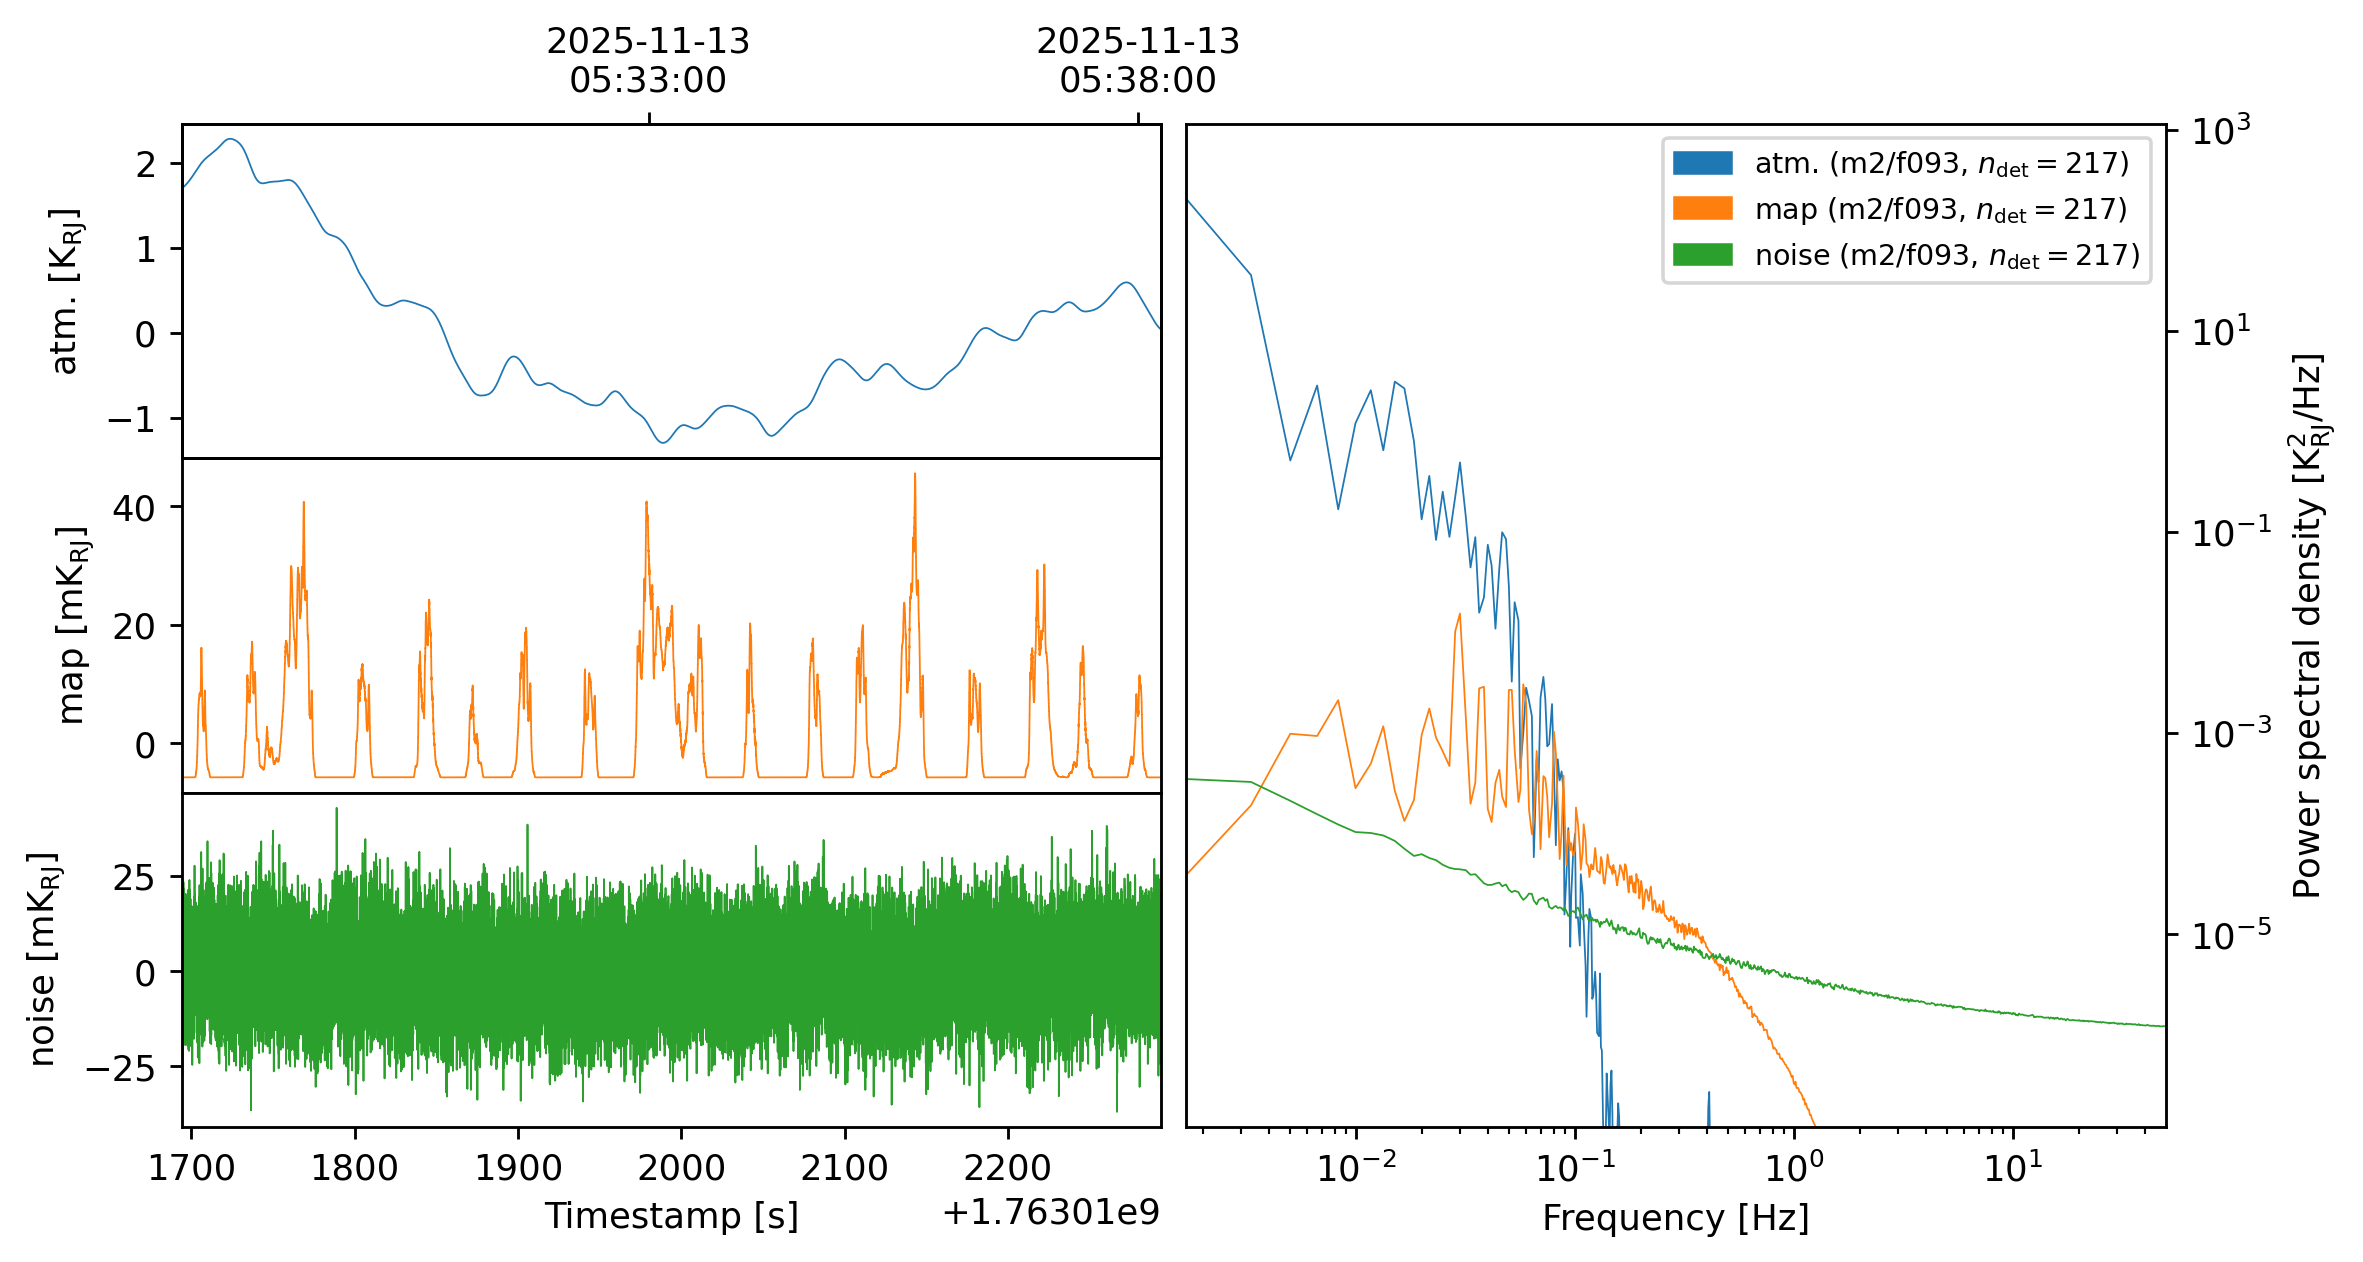

In [5]:
tods = sim.run()
tods[0].plot()

In [6]:
from maria.mappers import BinMapper

mapper = BinMapper(
    center=input_map.center,
    frame="ra/dec",
    width=10 / 60,
    height=10 / 60,
    resolution=0.05 / 60,
    tod_preprocessing={
        "window": {"name": "hamming"},
        "remove_modes": {"modes_to_remove": [0]},
        "remove_spline": {"knot_spacing": 60, "remove_el_gradient": True},
    },
    map_postprocessing={
        "gaussian_filter": {"sigma": 1},
        "median_filter": {"size": 1},
    },
    units="uK_RJ",
    tods=tods,
)

output_map = mapper.run()

2025-11-13 01:52:13.796 INFO: Inferring mapper stokes parameters 'I' for mapper.


Preprocessing TODs:   0%|                | 0/2 [00:00<?, ?it/s]

Preprocessing TODs:  50%|████████        | 1/2 [00:01<00:01,  1.09s/it]

Preprocessing TODs: 100%|████████████████| 2/2 [00:01<00:00,  1.13it/s]

Preprocessing TODs: 100%|████████████████| 2/2 [00:01<00:00,  1.09it/s]

Mapping band m2/f093:   0%|          | 0/2 [00:00<?, ?it/s, stokes=I, tod=1/2]

Mapping band m2/f093:   0%|          | 0/2 [00:01<?, ?it/s, stokes=I, tod=1/2]

Mapping band m2/f093:  50%|█████     | 1/2 [00:02<00:02,  2.01s/it, stokes=I, tod=1/2]

Mapping band m2/f093:  50%|█████     | 1/2 [00:02<00:02,  2.01s/it, stokes=I, tod=2/2]

Mapping band m2/f093: 100%|██████████| 2/2 [00:03<00:00,  1.43s/it, stokes=I, tod=2/2]

Mapping band m2/f093: 100%|██████████| 2/2 [00:03<00:00,  1.52s/it, stokes=I, tod=2/2]


2025-11-13 01:52:18.710 INFO: Ran mapper for band m2/f093 in 3.037 s.


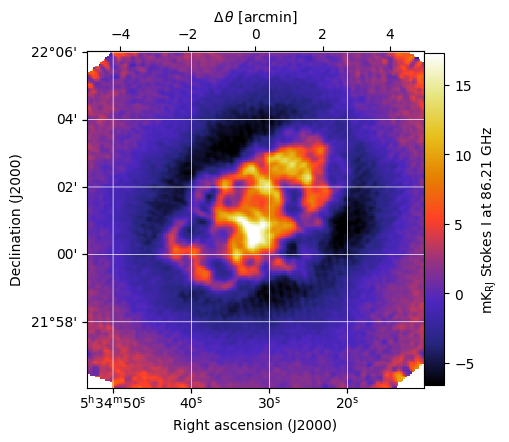

In [7]:
output_map.plot()
output_map.to_fits("/tmp/simulated_mustang_map.fits")